# DEEP LEARNING - Itération 1

# Partie 1 : Images

### Objectif à dépasser : weighted F1-score = 0.5534 (Resnet)

Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds\\images')

Récupérer les données:

In [2]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

Liste des images:

In [3]:
os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds')

In [4]:
import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html

#get current working directory
current_path = os.getcwd() 

#Training images path
images_path = current_path + r'/images/image_train/'

#List with the name of all training images
images_list = os.listdir(images_path)

Géneration nom des images:

In [5]:
#Create a column with the name of the picture
X['image name'] = 'image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
X['image name']

0        image_1263597046_product_3804725264.jpg
1         image_1008141237_product_436067568.jpg
2          image_938777978_product_201115110.jpg
3           image_457047496_product_50418756.jpg
4         image_1077757786_product_278535884.jpg
                          ...                   
84911      image_941495734_product_206719094.jpg
84912    image_1188462883_product_3065095706.jpg
84913     image_1009325617_product_440707564.jpg
84914    image_1267353403_product_3942400296.jpg
84915       image_684671297_product_57203227.jpg
Name: image name, Length: 84916, dtype: object

### Répartition des images dans les échantillons train, validation et test

Répartion :

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 123)


In [7]:
X_val = X_train.iloc[:2400,:]
y_val = y_train.iloc[:2400,:]

X_train = X_train.iloc[:21600,:]
y_train = y_train.iloc[:21600:,:]

X_test = X_test.iloc[:6000,:]
y_test = y_test.iloc[:6000,:]

Qualité de la répartitioon

In [8]:
trainy = pd.DataFrame(y_train.value_counts(), columns = ['Nombre_images_train'])
validy = pd.DataFrame(y_val.value_counts(), columns = ['Nombre_images_validation'])
testy = pd.DataFrame(y_test.value_counts(), columns = ['Nombre_images_test'])
train_valid = trainy.merge(validy, right_index = True, left_index = True)
train_valid_test = train_valid.merge(testy, right_index = True, left_index = True)
train_valid_test['y'] = train_valid_test.index
yval = []
for i in train_valid_test['y']:
    yval.append(i[0])
train_valid_test['y'] = yval
train_valid_test

,Nombre_images_train,Nombre_images_validation,Nombre_images_test,y
prdtypecode,,,,
2583,2557,261,702,2583
1300,1313,142,356,1300
1560,1299,158,365,1560
1280,1280,142,338,1280
2060,1258,129,381,2060
2522,1239,131,347,2522
2280,1233,158,316,2280
2403,1216,131,363,2403
1920,1119,123,303,1920


In [9]:
train_valid_test.index.tolist()[0]

(2583,)

In [10]:
np.max(train_valid_test.Nombre_images_train.tolist())

2557

<AxesSubplot:xlabel='y'>

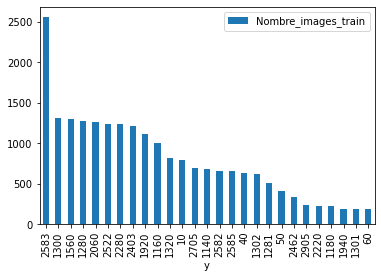

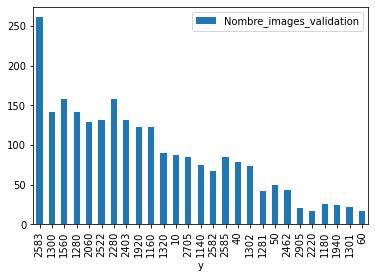

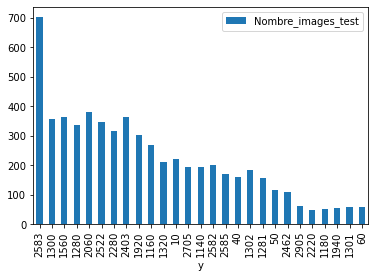

In [11]:
train_valid_test.plot.bar("y", "Nombre_images_train") 
train_valid_test.plot.bar("y", "Nombre_images_validation")
train_valid_test.plot.bar("y", "Nombre_images_test")

### Processus de génération des données

#### APPLICATION CNN

"A rough rule of thumb is that you need at least 1,000 images from each class you are trying to classify… and more is always better", https://medium.com/@bcwalraven/boost-your-cnn-with-the-keras-imagedatagenerator-99b1ef262f47

In [12]:
# On a pas dans la base de données complète (tous échantillons confondus) pour chaque classe 1000 images
# ==> Augmentation des données
y.value_counts().min()

764

In [13]:
from keras.utils import np_utils 

y_train_cnn = np_utils.to_categorical(y_train)
y_val_cnn = np_utils.to_categorical(y_val)
y_test_cnn = np_utils.to_categorical(y_test)

In [14]:
X_train['class'] = y_train
X_val['class'] = y_val
X_test['class'] = y_test

The generator will run through your image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training. These transformations are parameters on the generator that can be set when instantiated and can include rotations, shears, flips, and zooms. The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in your data such as where features are located in the image. 

Image Data Generator :

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = .2)
val_data_generator = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = .2) # Données sur lesquelles améliorer le modèle
test_data_generator = ImageDataGenerator(rescale=1./255) # Données sans entraînement, juste pour test

Directory's changement for the data access :

In [16]:
path = os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds\\images\\image_train')

Iteration process : 

In [17]:
batch_size = 32

X_train["class"] = X_train["class"].astype(str)
X_val["class"] = X_val["class"].astype(str)
X_test["class"] = X_test["class"].astype("str")

train_generator = train_data_generator.flow_from_dataframe(dataframe=X_train,
                                                          directory=path,
                                                           x_col = "image name",
                                                           y_col = "class",
                                                           class_mode ="sparse",
                                                          target_size = (128, 128), 
                                                          batch_size = batch_size)
val_generator = train_data_generator.flow_from_dataframe(dataframe=X_val,
                                                          directory=path,
                                                           x_col = "image name",
                                                           y_col = "class",
                                                           class_mode ="sparse",
                                                          target_size = (128, 128), 
                                                          batch_size = batch_size)

# Remarque test à ne pas toucher jusqu'à l'évaluation finale du modèle, ajout shuffle = False ?

test_generator = train_data_generator.flow_from_dataframe(dataframe=X_test,
                                                          directory=path,
                                                           x_col = "image name",
                                                           y_col = "class",
                                                           class_mode ="sparse",
                                                          target_size = (128, 128), 
                                                          batch_size = batch_size)

Found 21600 validated image filenames belonging to 27 classes.
Found 2400 validated image filenames belonging to 27 classes.
Found 6000 validated image filenames belonging to 27 classes.


Résumé données image : 

In [18]:
batchX, batchy = train_generator.next()
print('Batch shape (taille batch, shape image) = %s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape (taille batch, shape image) = (32, 128, 128, 3), min=0.000, max=1.000


# CNN

Package modélisation CNN :

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 

(#) Remarque : on  peut inclure dans la métrique de la compilation le F1_WEIGHTED


import keras.backend as K

def f1_weighted(true, pred): #shapes (batch, 4)

    #for metrics include these two lines, for loss, don't include them
    #these are meant to round 'pred' to exactly zeros and ones
    predLabels = K.argmax(pred, axis=-1)
    pred = K.one_hot(predLabels, 4) 


    ground_positives = K.sum(true, axis=0) + K.epsilon()       # = TP + FN
    pred_positives = K.sum(pred, axis=0) + K.epsilon()         # = TP + FP
    true_positives = K.sum(true * pred, axis=0) + K.epsilon()  # = TP
        #all with shape (4,)
    
    precision = true_positives / pred_positives 
    recall = true_positives / ground_positives
        #both = 1 if ground_positives == 0 or pred_positives == 0
        #shape (4,)

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        #still with shape (4,)

    weighted_f1 = f1 * ground_positives / K.sum(ground_positives) 
    weighted_f1 = K.sum(weighted_f1)

    
    return weighted_f1

Création du modèle :

In [20]:
model = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = 'valid',
                     input_shape = (128, 128, 3),
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

model.add(first_layer)
model.add(second_layer)

third_layer = Dropout(rate = 0.2)
fourth_layer = Flatten()
fifth_layer = Dense(units = 128, activation = "relu")
output_layer = Dense(units = 27, activation = "softmax")
model.add(third_layer)
model.add(fourth_layer)
model.add(fifth_layer)
model.add(output_layer)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

Résumé du modèle :

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15745152  
_________________________________________________________________
dense_1 (Dense)              (None, 27)                3483      
Total params: 15,751,067
Trainable params: 15,751,067
Non-trainable params: 0
____________________________________________

Entrainement  (Epochs = 2) :

In [22]:
history = model.fit(train_generator, epochs = 2, steps_per_epoch = len(X_train)//batch_size, validation_steps = len(X_train)//32, validation_data = val_generator)

Epoch 1/2
675/675 [==============================] - 312s 462ms/step - loss: 3.4288 - acc: 0.1153 - val_loss: 2.9420 - val_acc: 0.1713
Epoch 2/2
675/675 [==============================] - 267s 396ms/step - loss: 2.9177 - acc: 0.1781


Prédiction : 

In [23]:
y_pred_2 = model.predict(test_generator, verbose = 1)
y_pred_2 = y_pred_2.argmax(axis = 1)

188/188 [==============================] - 58s 311ms/step


Evaluation (F1-score) :

In [26]:
from sklearn.metrics import f1_score
f1_score(test_generator.classes,y_pred_2, average = "weighted")

0.04802152085610704

Entrainement (Epochs = 10) :

In [27]:
history = model.fit_generator(generator = train_generator, epochs = 10, steps_per_epoch = len(X_train)//batch_size, validation_steps = len(X_train)//32, validation_data = val_generator)

C:\Users\barry\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
675/675 [==============================] - 289s 428ms/step - loss: 2.8335 - acc: 0.1945 - val_loss: 2.7938 - val_acc: 0.2021
Epoch 2/10
675/675 [==============================] - 243s 360ms/step - loss: 2.7733 - acc: 0.2070
Epoch 3/10
675/675 [==============================] - 251s 371ms/step - loss: 2.7058 - acc: 0.2239
Epoch 4/10
675/675 [==============================] - 266s 394ms/step - loss: 2.7554 - acc: 0.2136
Epoch 5/10
675/675 [==============================] - 247s 365ms/step - loss: 2.6579 - acc: 0.2380
Epoch 6/10
675/675 [==============================] - 245s 362ms/step - loss: 2.6413 - acc: 0.2436
Epoch 7/10
675/675 [==============================] - 247s 366ms/step - loss: 2.6234 - acc: 0.2480
Epoch 8/10
675/675 [==============================] - 252s 373ms/step - loss: 2.6216 - acc: 0.2498
Epoch 9/10
675/675 [==============================] - 251s 372ms/step - loss: 2.5743 - acc: 0.2638
Epoch 10/10
675/675 [==============================] - 279s 414ms/step -

In [41]:
y_pred_10 = model.predict(test_generator,verbose=1)
y_pred_10 = np.argmax(y_pred_10, axis=1)

188/188 [==============================] - 48s 256ms/step


Evaluation (F1-score) :

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_generator.classes, y_pred_10))

[[  4   2  23   0   8   0  36   0   1   1  10  14   0   9   0  15   9   1
    9   0  67   2   3   0   8   1   0]
 [  5   2  25   0  12   0  24   1   4   2  18   7   0   9   0   8   9   0
    2   0  49   0   5   4   9   0   0]
 [  9   2  23   0  10   0  55   0   0   3  12  15   0  14   0   9  14   1
    7   1  78   0   4   1  12   0   0]
 [  0   0   6   0   4   0   9   0   1   0   3   2   0   2   0   2   1   0
    1   0  12   0   6   3   1   0   0]
 [  7   7  10   1  12   0  63   1   1   6  19  18   1  15   0  18  17   1
   10   0 105   0  17   0   8   1   0]
 [  2   1   9   0   3   1  24   0   1   2   7   9   0  14   0   7  10   2
    2   1  45   1   9   1   5   0   0]
 [  8   5  26   0  18   0  58   0   0   3  25  19   0  21   0  23  15   2
    7   0  90   0  15  12   7   2   0]
 [  1   1   5   0   2   0   7   0   0   1   0   6   0   1   0   4   2   0
    0   0  19   0   4   1   2   0   1]
 [  2   2  17   0  10   0  23   0   2   3   6  10   1   6   0  11  11   1
    6   0  55   0   7 

In [43]:
from sklearn.metrics import f1_score
f1_score(test_generator.classes,y_pred_10, average = "weighted")

0.04958041108929405